# **TECHNOLOGICAL INFRASTRUCTURES FOR DS ASSIGNMENT**

**Importazione delle librerie**

In [1]:
import pyspark
import pandas as pd
import databricks.koalas as ks
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pyspark.sql.functions as f

from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.functions import col
from pyspark.sql.types import StringType
from functools import reduce  
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

**1. Carry out a descriptive statistical analysis of the table data**

In [2]:
#creiamo una sessione Spark nominata Assignment_Spark
spark=SparkSession.builder.appName("Assignment_Spark").getOrCreate()

In [3]:
#importiamo i dataset in Pandas e li convertiamo in Spark
pdf0 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_A_zaini_piccoli_9-11.xlsx', sheet_name='detailed results',inferSchema=True)
dfA = spark.createDataFrame(pdf0)
pdf1 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_B_piccole_45-55_1big_knapsack.xlsx', sheet_name='detailed results',inferSchema=True)
dfB = spark.createDataFrame(pdf1)
pdf2 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_C_piccole_45-55.xlsx', sheet_name='detailed results',inferSchema=True)
dfC = spark.createDataFrame(pdf2)
pdf3 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_D_con_più zaini.xlsx', sheet_name='più zaini',inferSchema=True)
dfD = spark.createDataFrame(pdf3)
pdf4 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_E_con_più items.xlsx', sheet_name='più items',inferSchema=True)
dfE = spark.createDataFrame(pdf4)
pdf5 = pd.read_excel('C:/Users/Eric/Desktop/assignment_TIDS/risultati_F_zaini_piccoli_27-33.xlsx', sheet_name='detailed results',inferSchema=True)
dfF = spark.createDataFrame(pdf5)

In [4]:
#uniamo i dataset
df=reduce(DataFrame.unionAll, [dfA,dfB,dfC,dfD,dfE,dfF])

In [5]:
df.show(5)

+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
| F1| F2| F3| F4|Rep|MODEL_OF|MODEL_OFUB|MODEL_TIME|CBC_OF|CBC_TIME|CBC_FC|CBC_PC|NEWCBC_OF|NEWCBC_TIME|NEWCBC_FC|
+---+---+---+---+---+--------+----------+----------+------+--------+------+------+---------+-----------+---------+
|  3|400|  9|  A|  1|     197|       197|      0.29|   197|    0.02|     0|     1|      197|      0.056|        0|
|  3|400|  9|  A|  2|     162|       162|      0.24|   162|    0.02|     0|     0|      162|      0.016|        0|
|  3|400|  9|  A|  3|     165|       165|      0.85|   165|    0.01|     0|     0|      165|      0.023|        0|
|  3|400|  6|  A|  4|     178|       178|     0.311|   178|    0.02|     0|     1|      178|      0.012|        0|
|  3|400|  9|  A|  5|     220|       220|      0.72|   220|    0.03|     0|     1|      220|      0.038|        0|
+---+---+---+---+---+--------+----------+----------+------+--------+------+-----

In [6]:
#convertiamo la variabile F1 da numerica a string
df = df.withColumn("F1",col("F1").cast(StringType()))

In [7]:
df.printSchema()

root
 |-- F1: string (nullable = true)
 |-- F2: long (nullable = true)
 |-- F3: long (nullable = true)
 |-- F4: string (nullable = true)
 |-- Rep: long (nullable = true)
 |-- MODEL_OF: long (nullable = true)
 |-- MODEL_OFUB: long (nullable = true)
 |-- MODEL_TIME: double (nullable = true)
 |-- CBC_OF: long (nullable = true)
 |-- CBC_TIME: double (nullable = true)
 |-- CBC_FC: long (nullable = true)
 |-- CBC_PC: long (nullable = true)
 |-- NEWCBC_OF: long (nullable = true)
 |-- NEWCBC_TIME: double (nullable = true)
 |-- NEWCBC_FC: long (nullable = true)



In [8]:
#la funzione describe ci offre le statistiche essenziali. Si prende in considerazione le funzioni obiettivo e le variabili temporali
df.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()
df.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()

+-------+-----------------+-----------------+-------------------+
|summary|       MODEL_TIME|         CBC_TIME|        NEWCBC_TIME|
+-------+-----------------+-----------------+-------------------+
|  count|              400|              400|                400|
|   mean|       293.390935|      254.8061825|0.19791249999999994|
| stddev|880.5823451249038|775.7127981301821|0.23503598581988636|
|    min|             0.08|             0.01|              0.011|
|    max|           3600.0|           3600.0|              1.562|
+-------+-----------------+-----------------+-------------------+

+-------+------------------+------------------+-----------------+
|summary|          MODEL_OF|            CBC_OF|        NEWCBC_OF|
+-------+------------------+------------------+-----------------+
|  count|               400|               400|              400|
|   mean|          281.9075|          281.8625|           281.81|
| stddev|102.20495867468581|102.18639214984306|102.0867678517939|
|    min|

In [9]:
#comprendiamo meglio la distribuzione della variabile categorica F1 rispetto alle tipologie proposte da F4
#Si nota che la distribuzione delle tipologie 20 e 15 non risulta confrontabile con le altre
df.stat.crosstab("F1","F4").show()

+-----+---+---+---+---+---+---+
|F1_F4|  A|  B|  C|  D|  E|  F|
+-----+---+---+---+---+---+---+
|   15|  0|  0|  0| 10|  0|  0|
|    5| 30| 30| 30|  0|  0| 30|
|   10| 30| 30| 30|  0| 20| 30|
|   20|  0|  0|  0| 10|  0|  0|
|    3| 30| 30| 30|  0|  0| 30|
+-----+---+---+---+---+---+---+



In [10]:
#studiamo i subset rispetto alla variabile categorica F1
sub_3=df.filter(df.F1==3)
sub_5=df.filter(df.F1==5)
sub_10=df.filter(df.F1==10)
sub_15=df.filter(df.F1==15)
sub_20=df.filter(df.F1==20)

In [11]:
#TIME
#la categoria 3 presenta range simili tra MODEL e CBC, con media e varianza più basse in CBC. NEWCBC ha range, media e varianza nettamente inferiori
#le categorie 5 e 10 rimarcano questa differenza di MODEL e CBC rispetto a NEWCBC, presentando una distribuzione completamente diversa 
sub_3.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()
sub_5.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()
sub_10.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()

#le tipologie 15 e 20 non sono confrontabili per via della numerosità nettamente inferiore. Si osserva che il range dei valori è nettamente superiore in MODEL e CBC
sub_15.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()
sub_20.describe('MODEL_TIME','CBC_TIME','NEWCBC_TIME').show()

+-------+------------------+------------------+--------------------+
|summary|        MODEL_TIME|          CBC_TIME|         NEWCBC_TIME|
+-------+------------------+------------------+--------------------+
|  count|               120|               120|                 120|
|   mean|2.0632083333333333|0.8206416666666667|0.055166666666666676|
| stddev|2.1089815690881464|1.1373099826206694| 0.03928870373143352|
|    min|              0.08|              0.01|               0.011|
|    max|             9.894|             4.633|               0.163|
+-------+------------------+------------------+--------------------+

+-------+-----------------+------------------+-------------------+
|summary|       MODEL_TIME|          CBC_TIME|        NEWCBC_TIME|
+-------+-----------------+------------------+-------------------+
|  count|              120|               120|                120|
|   mean|11.23695833333333|         10.335625|0.10926666666666665|
| stddev|42.51692476554787|29.8843575141689

In [12]:
#Lo studio della funzione obiettivo ci mostra che non vi è pressocchè alcuna differenza tra le tipologie di algoritmo rispetto alle varie classi
sub_3.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()
sub_5.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()
sub_10.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()
sub_15.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()
sub_20.describe('MODEL_OF','CBC_OF','NEWCBC_OF').show()

+-------+------------------+------------------+-----------------+
|summary|          MODEL_OF|            CBC_OF|        NEWCBC_OF|
+-------+------------------+------------------+-----------------+
|  count|               120|               120|              120|
|   mean|279.59166666666664|279.59166666666664|279.4916666666667|
| stddev| 92.69680366098706| 92.69680366098706|92.57111695706102|
|    min|               108|               108|              108|
|    max|               658|               658|              658|
+-------+------------------+------------------+-----------------+

+-------+------------------+------------------+------------------+
|summary|          MODEL_OF|            CBC_OF|         NEWCBC_OF|
+-------+------------------+------------------+------------------+
|  count|               120|               120|               120|
|   mean|            279.65|            279.65|            279.65|
| stddev|114.01648487622046|114.01648487622046|114.01648487622046|
|  

In [13]:
#convertiamo il dataframe pyspark in koalas, facilitando lo studio di correlazione
kdf=df.to_koalas()

In [14]:
#come ci si aspettava vi è una correlazione pressocchè unitaria tra le funzioni obiettivo, e tra le variabili temporali di MODEL e CBC. Le altre variabili non presentano particolari correlazioni
ks.DataFrame.corr(kdf)

,F2,F3,Rep,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC
F2,1.000000,0.867809,-0.277702,0.540895,0.572436,0.583499,0.540677,0.584216,0.297691,0.444480,0.539737,0.534790,NaN
F3,0.867809,1.000000,-0.251664,0.628034,0.659081,0.577608,0.627819,0.583315,0.346445,0.451041,0.627523,0.524556,NaN
Rep,-0.277702,-0.251664,1.000000,-0.168373,-0.183636,-0.269951,-0.166947,-0.281157,-0.167943,-0.219248,-0.168601,-0.293570,NaN
MODEL_OF,0.540895,0.628034,-0.168373,1.000000,0.994146,0.325523,0.999880,0.338148,0.164382,0.223505,0.999926,0.314580,NaN
MODEL_OFUB,0.572436,0.659081,-0.183636,0.994146,1.000000,0.396773,0.994122,0.405273,0.195137,0.279649,0.994249,0.358121,NaN
MODEL_TIME,0.583499,0.577608,-0.269951,0.325523,0.396773,1.000000,0.326282,0.835306,0.395717,0.567852,0.325179,0.664052,NaN
CBC_OF,0.540677,0.627819,-0.166947,0.999880,0.994122,0.326282,1.000000,0.334941,0.165032,0.224688,0.999811,0.313120,NaN
CBC_TIME,0.584216,0.583315,-0.281157,0.338148,0.405273,0.835306,0.334941,1.000000,0.393352,0.569047,0.338573,0.677498,NaN
CBC_FC,0.297691,0.346445,-0.167943,0.164382,0.195137,0.395717,0.165032,0.393352,1.000000,0.737636,0.165286,0.434371,NaN
CBC_PC,0.444480,0.451041,-0.219248,0.223505,0.279649,0.567852,0.224688,0.569047,0.737636,1.000000,0.224475,0.510303,NaN


In [15]:
#per facilitare la realizzazione dei grafici si estraggono le variabili pyspark convertendole in lista
x_MOD_TIME=df.select('MODEL_TIME').rdd.map(lambda row : row.MODEL_TIME).collect()
x_CBC_TIME=df.select('CBC_TIME').rdd.map(lambda row : row.CBC_TIME).collect()
x_NEWCBC_TIME=df.select('NEWCBC_TIME').rdd.map(lambda row : row.NEWCBC_TIME).collect()

In [16]:
x_MOD_OF=df.select('MODEL_OF').rdd.map(lambda row : row.MODEL_OF).collect()
x_CBC_OF=df.select('CBC_OF').rdd.map(lambda row : row.CBC_OF).collect()
x_NEWCBC_OF=df.select('NEWCBC_OF').rdd.map(lambda row : row.NEWCBC_OF).collect()
y=df.select('F1').rdd.map(lambda row : row.F1).collect()

In [17]:
y_F4=df.select('F4').rdd.map(lambda row : row.F4).collect()

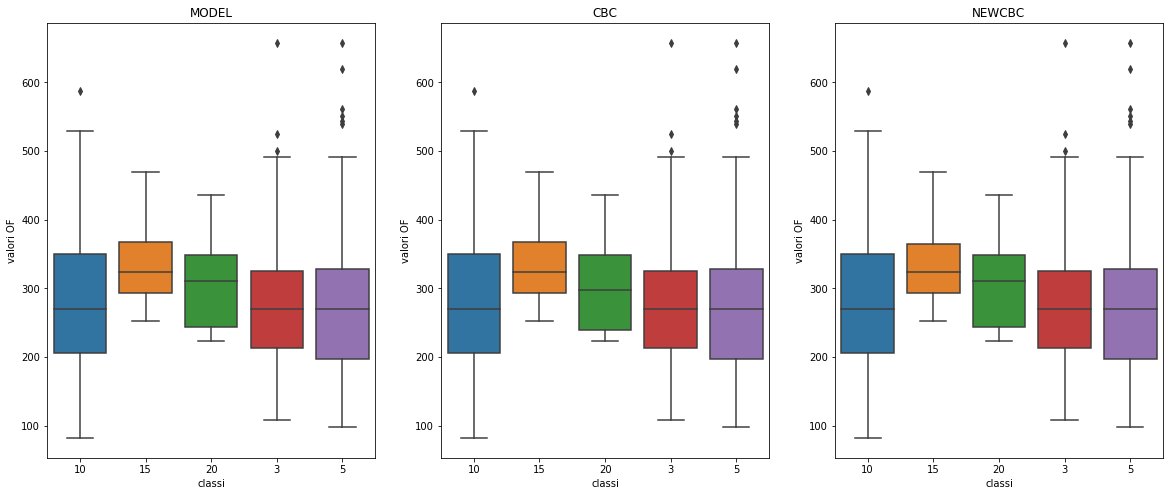

In [18]:
#come ci si aspettava, i boxplot delle funzioni obiettivo risultano identici rispetto alle varie classi
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.boxplot(x=y, y=x_MOD_OF,ax=ax1).set(title='MODEL',xlabel='classi',ylabel='valori OF')
sns.boxplot(x=y, y=x_CBC_OF,ax=ax2).set(title='CBC',xlabel='classi',ylabel='valori OF')
sns.boxplot(x=y, y=x_NEWCBC_OF,ax=ax3).set(title='NEWCBC',xlabel='classi',ylabel='valori OF')

plt.show()

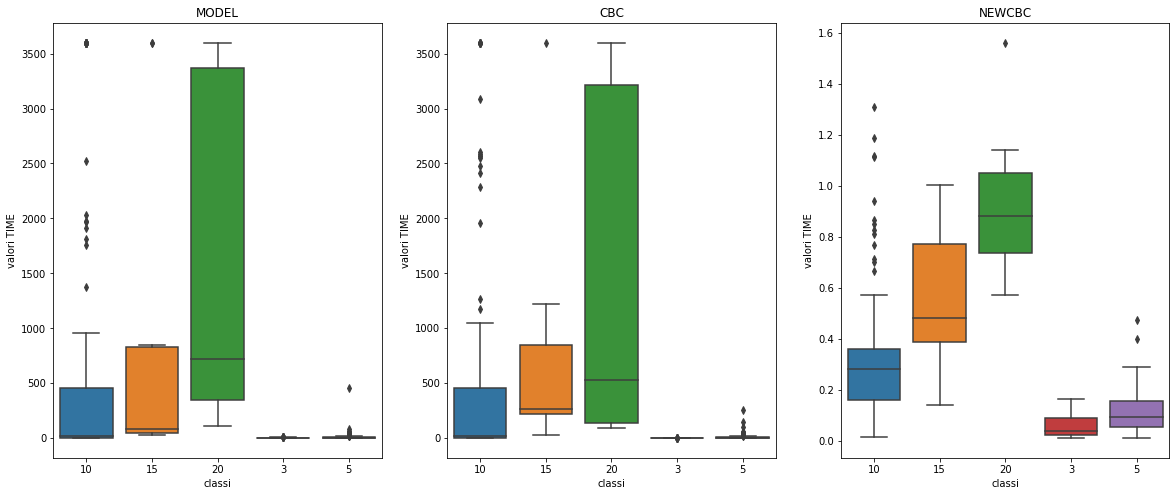

In [19]:
#i boxplot rispetto al tempo confermano le ipotesi precedenti per cui è evidente che le classi 15 e 20 presentano una distribuzione ben diversa dalle altre
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.boxplot(x=y, y=x_MOD_TIME,ax=ax1).set(title='MODEL',xlabel='classi',ylabel='valori TIME')
sns.boxplot(x=y, y=x_CBC_TIME,ax=ax2).set(title='CBC',xlabel='classi',ylabel='valori TIME')
sns.boxplot(x=y, y=x_NEWCBC_TIME,ax=ax3).set(title='NEWCBC',xlabel='classi',ylabel='valori TIME')

plt.show()

**2. Evaluate the effectiveness of the algorithms using the OF value to compare the algorithms.
Use a statistical test (first verify that the conditions for the selected test holds) and
appropriate visualizations.**

In [20]:
#creo un dizionario dalle variabili estratte in precedenza
dic={'x_MOD_OF':x_MOD_OF,'x_CBC_OF':x_CBC_OF,'x_NEWCBC_OF':x_NEWCBC_OF}

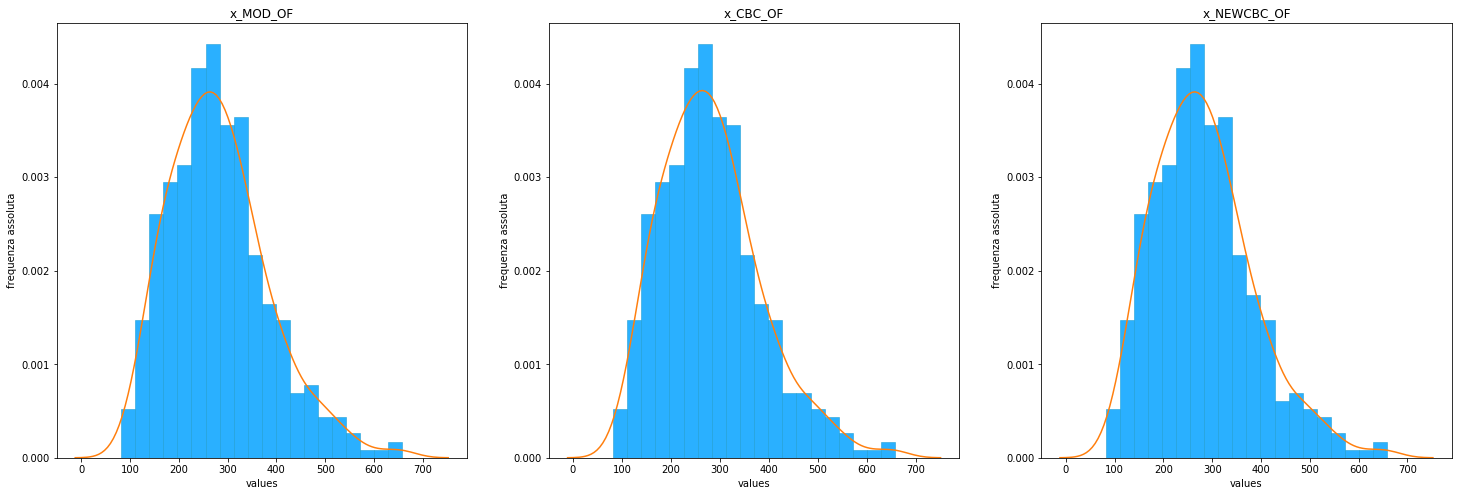

In [21]:
#le distribuzioni delle OF sono pressocchè identiche come previsto dalle statistiche descrittive. Data la curva di densità si può supporre normalità
bins=np.arange(50,700,30)
fig=plt.figure(figsize=(25,8))

n=1
for k,v in dic.items():

    ax=fig.add_subplot(1,3,n)
    ax.hist(v, bins=20,facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5,density=True)
    
    sns.kdeplot(v)
    
    plt.title(k)
    plt.xlabel('values')
    plt.ylabel('frequenza assoluta')
    
    n+= 1

plt.show()

In [22]:
#effettuiamo un test di normalità rispetto alle distribuzioni. Come si sospettava tutti i testi accettano l'ipotesi di normalità della distribuzione
val_MOD=(kdf.MODEL_OF.values-np.mean(kdf.MODEL_OF.values))/np.std(kdf.MODEL_OF.values)
print(stats.kstest(val_MOD,'norm'))

val_CBC=(kdf.CBC_OF.values-np.mean(kdf.CBC_OF.values))/np.std(kdf.CBC_OF.values)
print(stats.kstest(val_CBC,'norm'))

val_NEWCBC=(kdf.NEWCBC_OF.values-np.mean(kdf.NEWCBC_OF.values))/np.std(kdf.NEWCBC_OF.values)
print(stats.kstest(val_NEWCBC,'norm'))

C:\Users\Eric\anaconda3\lib\site-packages\databricks\koalas\generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


KstestResult(statistic=0.056732976986455075, pvalue=0.1466042846478776)
KstestResult(statistic=0.05655028376444238, pvalue=0.14907215558115136)
KstestResult(statistic=0.05630385773371849, pvalue=0.15245393870965315)


In [28]:
#data l'assunzione di normalità si è scelto di operare con il test One Way Anova, con H0: mean(MOD_OF)==mean(CBC_OF)==mean(NEWCBC_OF)
def One_Way_Anova(x,y,z):
    """Questa funzione prende in input i nomi di 3 variabili del DataFrame Koalas kdf ed esegue il test Anova ad Una Via con alfa 0.05"""

    concat=ks.concat([kdf[x],kdf[y],kdf[z]])
    N=len(concat)
    n=len(kdf[x]) # n== len(y) == len(z)
    alf=len([x,y,z]) #numero di gruppi
    
    s=[]
    for i in [x,y,z]:
        s.append(kdf[i].sum())
    
    tot_sum=sum(s)
    sum_2=sum(map(lambda x:x**2, s))
    concat_2=concat.apply(lambda x:x**2).sum()
    SSB=(sum_2/n)-(sum(s)/N) #Sum of Squares Between
    SSW=(concat_2/n)-(sum_2/n) #Sum of Squares Within
    
    dfb=alf-1
    dfw=N-alf
    
    F=((SSB/dfb)/(SSW/dfw)) #statistica test 
    Fisher=stats.f.ppf(0.95,dfb,dfw) #quantile della distribuzione al 95%
    
    if F>Fisher : result=str("rifiuto H0, quindi le medie sono diverse")
    if F<Fisher : result=str('accetto H0, quindi le medie sono uguali')
    
    return print(result)

In [29]:
One_Way_Anova('MODEL_OF','CBC_OF','NEWCBC_OF')

C:\Users\Eric\anaconda3\lib\site-packages\pyspark\sql\pandas\functions.py:386: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  "in the future releases. See SPARK-28264 for more details.", UserWarning)


accetto H0, quindi le medie sono uguali


**3. Evaluate the efficiency of the algorithms using the TIME value to compare the algorithms.
Use a statistical test (first verify that the conditions for the selected test holds) and
appropriate visualizations.**

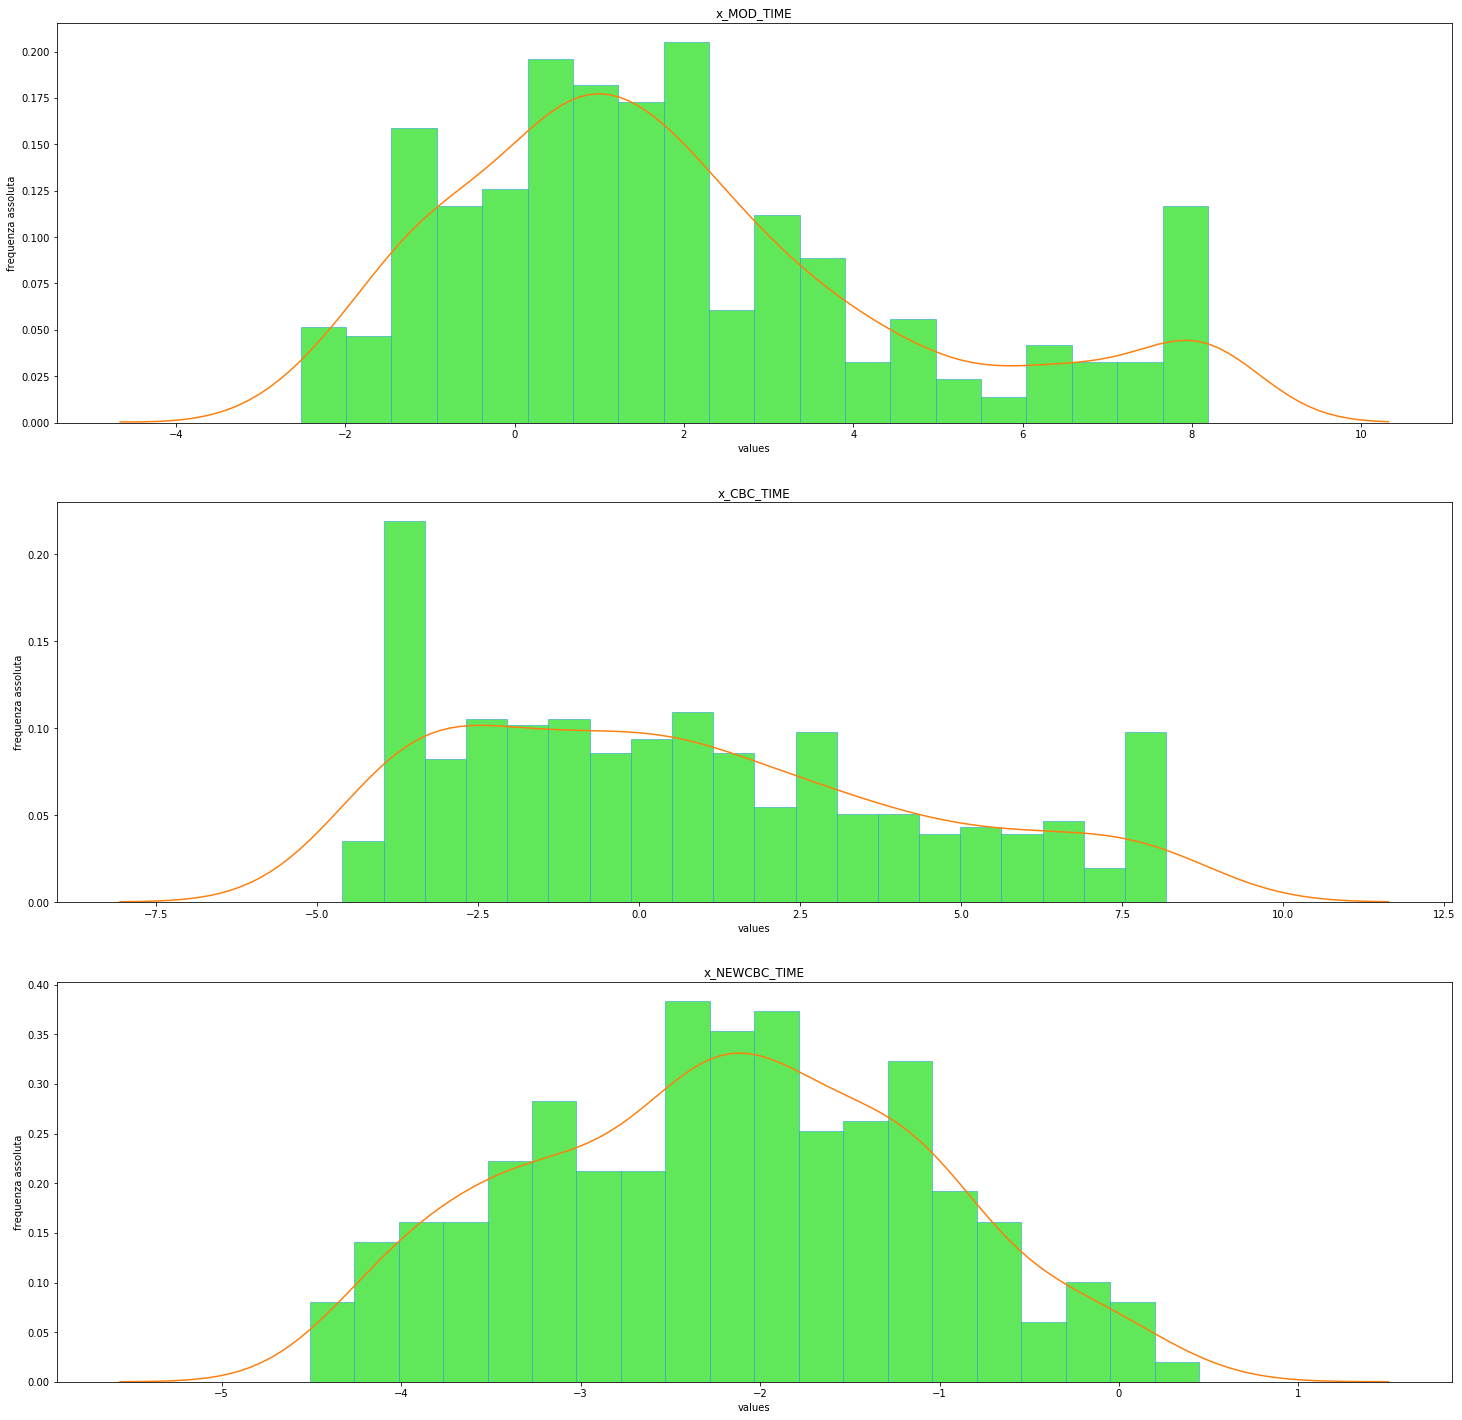

In [25]:
#Rispetto alle variabili temporali si predilige una trasformata logaritmica per smorzare l'effetto dei valori alti. Tuttavia si può supporre normalità soltanto nel caso del modello NEWCBC
x1=np.log(x_MOD_TIME)
x2=np.log(x_CBC_TIME)
x3=np.log(x_NEWCBC_TIME)

dic={'x_MOD_TIME':x1,'x_CBC_TIME':x2,'x_NEWCBC_TIME':x3}

bins_dc={'x_MOD_TIME':np.arange(0,50,0.25),'x_CBC_TIME':np.arange(0,48,0.25),'x_NEWCBC_TIME':np.arange(0,15,0.25)}
fig=plt.figure(figsize=(25,25))

n=1
for k,v in dic.items():
    
    bins=list(bins_dc[k])
    ax=fig.add_subplot(3,1,n)
    ax.hist(v, bins=20,facecolor = '#61E75A', edgecolor='#169acf', linewidth=0.5,density=True)
    
    sns.kdeplot(v)
    
    plt.title(k)
    plt.xlabel('values')
    plt.ylabel('frequenza assoluta')
    
    n+= 1

plt.show()

In [26]:
#per prima cosa verifichiamo l'assunzione di normalità per le tre distribuzioni
val_MOD=(kdf.MODEL_TIME.values-np.mean(kdf.MODEL_TIME.values))/np.std(kdf.MODEL_TIME.values)
print(stats.kstest(val_MOD,'norm'))

val_CBC=(kdf.CBC_OF.values-np.mean(kdf.CBC_TIME.values))/np.std(kdf.CBC_TIME.values)
print(stats.kstest(val_CBC,'norm'))

val_NEWCBC=(kdf.NEWCBC_TIME.values-np.mean(kdf.NEWCBC_TIME.values))/np.std(kdf.NEWCBC_TIME.values)
print(stats.kstest(val_NEWCBC,'norm'))

C:\Users\Eric\anaconda3\lib\site-packages\databricks\koalas\generic.py:603: UserWarning: We recommend using `Series.to_numpy()` instead.
  warnings.warn("We recommend using `{}.to_numpy()` instead.".format(type(self).__name__))


KstestResult(statistic=0.43254385843408105, pvalue=1.5548647892293087e-68)
KstestResult(statistic=0.4173028767314126, pvalue=1.3127496347637022e-63)
KstestResult(statistic=0.21294438927509368, pvalue=2.138962482527853e-16)


In [27]:
#Dato il rifiuto dell'assunzione di normalità per tutte e tre le distribuzioni si passa ad un test di differenza tra medie che non presuppone normalità di distribuzione
#Il test preso in considerazione consente di confrontare soltanto due distribuzioni per volta, quindi verrà eseguito 3 volte

#H0: differenza di medie MOD-CBC = 0
#H1: MOD-CBC > 0

norm=stats.norm.ppf(.95) #normale standard al 95%

for i in ['MODEL_TIME','CBC_TIME']:
    for j in ['MODEL_TIME','CBC_TIME','NEWCBC_TIME']:
        if (i != j)|((i=='CBC_TIME')&(j=='MODEL_TIME')):
            n=len(kdf[i])
            Z=(np.mean(kdf[i].values)-np.mean(kdf[j].values))/np.sqrt((np.var(kdf[i].values)/n)+(np.var(kdf[j].values)/n))
    
            if Z>norm: result=str("il test rifiuta H0, quindi "+i+" è maggiore di " + j )
            if Z<norm: result=str("il test non rifiuta H0, quindi le medie di "+i+ " e di "+j+" sono uguali")
        
            pvalue=1-stats.norm.cdf(Z)

            print("{}, il pvalue è {}".format(result,pvalue))

il test non rifiuta H0, quindi le medie di MODEL_TIME e di CBC_TIME sono uguali, il pvalue è 0.25513670517186926
il test rifiuta H0, quindi MODEL_TIME è maggiore diNEWCBC_TIME, il pvalue è 1.301780905293981e-11
il test non rifiuta H0, quindi le medie di CBC_TIME e di MODEL_TIME sono uguali, il pvalue è 0.7448632948281307
il test rifiuta H0, quindi CBC_TIME è maggiore diNEWCBC_TIME, il pvalue è 2.470235127560727e-11


In [ ]:
#N.B l'output ritorna un messaggio ridondante

**4. Study the correlation between features and values of OF/Time, FC and PC. Which features
have the greatest impact on the execution time of the two algorithms? Is it possible to
predict the TIME or OF variable? (you can make them categorical).**

In [30]:
corr=ks.DataFrame.corr(kdf)

In [31]:
corr1=corr.drop(['F2','F3','Rep'],axis=1)

In [32]:
corr2=corr1.iloc[0:3,:]

In [33]:
#dalla tabella delle correlazioni tra variabili di input non si trovano correlazioni particolarmente rilevanti
corr2

,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC
F2,0.540895,0.572436,0.583499,0.540677,0.584216,0.297691,0.444480,0.539737,0.534790,NaN
F3,0.628034,0.659081,0.577608,0.627819,0.583315,0.346445,0.451041,0.627523,0.524556,NaN
Rep,-0.168373,-0.183636,-0.269951,-0.166947,-0.281157,-0.167943,-0.219248,-0.168601,-0.293570,NaN


In [34]:
df_out=df.select([
 'MODEL_TIME',
 'CBC_TIME',
 'NEWCBC_TIME'])

In [35]:
#computiamo gli intervalli di confidenza rispetto alle variabili prese in considerazione
bounds = {
    c: dict(
        zip(["q1", "q3"], df_out.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df_out.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)



{'MODEL_TIME': {'q1': 1.02, 'q3': 20.808, 'lower': -28.662000000000003, 'upper': 50.49}, 'CBC_TIME': {'q1': 0.09, 'q3': 20.569, 'lower': -30.6285, 'upper': 51.287499999999994}, 'NEWCBC_TIME': {'q1': 0.047, 'q3': 0.26, 'lower': -0.2725, 'upper': 0.5795}}


In [36]:
#in questo modo selezioniamo le osservazioni outlier rispetto alle sole variabili d'interesse. Lo scopo sarà quello di non essere costretti ad eliminare l'intera osservazione quando è outlier rispetto sono ad alcune delle variabili selezioante. Verrà invece eliminata solo per la variaible d'interesse
df_out=df_out.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in df_out.columns
    ]
)

In [37]:
kdf_new=df_out.to_koalas()

In [38]:
#uniamo al dataset le variabili non considerate precedentemente
new_df = kdf.merge(kdf_new, on=['MODEL_TIME', 'CBC_TIME', 'NEWCBC_TIME'], how='inner')

In [39]:
#le nuove variaibli hanno indice 1 laddove l'osservazione è outlier rispetto alla variabile di riferimento
new_df.head(10)

,F1,F2,F3,F4,Rep,MODEL_OF,MODEL_OFUB,MODEL_TIME,CBC_OF,CBC_TIME,CBC_FC,CBC_PC,NEWCBC_OF,NEWCBC_TIME,NEWCBC_FC,MODEL_TIME_out,CBC_TIME_out,NEWCBC_TIME_out
0,20,600,9,D,1,251,261,3600.000,251,3600.000,1,1,251,1.073,0,1,1,1
1,10,400,7,C,2,195,195,0.240,195,0.030,0,0,195,0.048,0,0,0,0
2,3,400,7,C,4,187,187,0.860,187,0.010,0,0,187,0.022,0,0,0,0
3,3,600,9,F,2,264,264,2.040,264,1.680,0,1,264,0.021,0,0,0,0
4,3,600,12,F,8,340,340,4.850,340,0.300,0,1,340,0.120,0,0,0,0
5,3,600,12,C,9,475,475,7.437,475,3.009,0,3,475,0.159,0,0,0,0
6,5,500,10,B,10,438,438,6.990,438,4.596,0,1,438,0.172,0,0,0,0
7,10,500,8,F,2,232,232,28.775,232,20.759,0,7,232,0.223,0,0,0,0
8,10,600,10,B,9,337,337,512.083,337,2475.750,0,48,337,0.334,0,1,1,0
9,5,600,10,C,2,323,323,0.280,323,0.090,0,0,323,0.040,0,0,0,0


In [40]:
#ora si provede alla selezione delle variabili utili alla regressione
reg1=new_df.iloc[:,[0,1,2,3,4,7,15]]

In [41]:
#si eliminano gli outliers relativi alla variabile target considerata nella regressione
reg1=reg1[reg1.MODEL_TIME_out==0]

In [42]:
reg1.head()

,F1,F2,F3,F4,Rep,MODEL_TIME,MODEL_TIME_out
1,10,400,7,C,2,0.240,0
2,3,400,7,C,4,0.860,0
3,3,600,9,F,2,2.040,0
4,3,600,12,F,8,4.850,0
5,3,600,12,C,9,7.437,0


In [43]:
#si fa lo stesso per le altre variabili target
reg2=new_df.iloc[:,[0,1,2,3,4,9,16]]
reg2=reg2[reg2.CBC_TIME_out==0]

reg3=new_df.iloc[:,[0,1,2,3,4,13,17]]
reg3=reg3[reg3.NEWCBC_TIME_out==0]

In [44]:
#si eliminano le variaibli non rilevanti allo scopo della regressione
reg_1=reg1.drop('MODEL_TIME_out',axis=1)
reg_2=reg2.drop('CBC_TIME_out',axis=1)
reg_3=reg3.drop('NEWCBC_TIME_out',axis=1)

In [45]:
#si applica il logaritmo alle variabili target per soddisfare la condizione di normalità
reg_1['MODEL_TIME']=np.log(reg_1['MODEL_TIME'])
reg_2['CBC_TIME']=np.log(reg_2['CBC_TIME'])
reg_3['NEWCBC_TIME']=np.log(reg_3['NEWCBC_TIME'])

In [46]:
#si convertono i DataFrame Koalas a DataFrame Spark
reg_mod=reg_1.to_spark()
reg_cbc=reg_2.to_spark()
reg_new=reg_3.to_spark()

In [52]:
#si procede alla creazione di variabili eseguendo one hot encoding rispetto alle variaibli categoriali F1 ed F4 d'interesse
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_mod).transform(reg_mod)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoder(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

In [53]:
#si prepara l'input del modello
vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'MODEL_TIME'])

#si esegue la regressione
lr = LinearRegression(featuresCol = 'features', labelCol='MODEL_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
    
trainingSummary = lr_model.summary

print("Variabile Target: "+i)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))
print("Intercept: " + str(lr_model.intercept))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("")
print("")

Variabile Target: CBC_TIME
Coefficients: [0.60243616 1.         1.26212785 1.00273882 1.         0.34807312
 1.         1.02796895 1.056305   1.        ]
Intercept: -0.12400249655009558
RMSE: 1.253903
r2: 0.359662




In [54]:
#si procede alla creazione di variabili eseguendo one hot encoding rispetto alle variaibli categoriali F1 ed F4 d'interesse
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_cbc).transform(reg_cbc)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoder(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

In [55]:
#si prepara l'input del modello
vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'CBC_TIME'])

#si esegue la regressione
lr = LinearRegression(featuresCol = 'features', labelCol='CBC_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
    
trainingSummary = lr_model.summary

print("Variabile Target: "+i)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))
print("Intercept: " + str(lr_model.intercept))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("")
print("")

Variabile Target: CBC_TIME
Coefficients: [0.41337465 1.         1.         1.0030023  1.19434868 0.58851443
 0.34538569 2.78893545 2.34354414 1.        ]
Intercept: -3.4882656459772856
RMSE: 1.793121
r2: 0.409622




In [56]:
#si procede alla creazione di variabili eseguendo one hot encoding rispetto alle variaibli categoriali F1 ed F4 d'interesse
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_new).transform(reg_new)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoder(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

In [57]:
#si prepara l'input del modello
vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'NEWCBC_TIME'])

#si esegue la regressione
lr = LinearRegression(featuresCol = 'features', labelCol='NEWCBC_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(vhouse_df)
    
trainingSummary = lr_model.summary

print("Variabile Target: "+i)
print("Coefficients: " + str(np.exp(lr_model.coefficients)))
print("Intercept: " + str(lr_model.intercept))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("")
print("")

Variabile Target: CBC_TIME
Coefficients: [1.57231218 0.64889989 1.         1.         1.00042716 1.03813197
 1.         1.         1.         1.         1.         1.        ]
Intercept: -2.92033345531534
RMSE: 0.745002
r2: 0.426861




In [ ]:
#osservando i coefficienti si può constatare che la feature che ha maggiore impatto sul tempo è la F4 (A,B,C,D,E,F) , infatti osservando i dataset si osserva che al crescere della lettera aumenta chiaramente il tempo di esecuzione dei modelli 

In [58]:
#per le variabili OF se ne considera una soltanto per dimostrare la bontà dell'utilizzo della regressione a fini predittivi, dato il fatto che le distribuzioni delle altre variaibli OF sono pressocchè identiche
kdf_OF=kdf.loc[:,[ 'F1','F2', 'F3','F4', 'Rep','NEWCBC_OF']]

In [59]:
kdf_OFreg=kdf_OF.to_spark()

In [60]:
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(kdf_OFreg).transform(kdf_OFreg)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoder(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'NEWCBC_OF'])

splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='NEWCBC_OF', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-11.59335577077029,4.421710943076866,11.128259567569339,70.58261495798754,0.08205889373537686,26.26918438053088,-32.95812373055403,105.2604773488989,46.64494486799907,37.025043120078244,-7.782081658049279,-0.9655596525166312]
Intercept: -43.178576443515226


In [61]:
#risulta un buon coefficiente R^2 del modello sul training
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 60.368103
r2: 0.619074


In [62]:
#l'R^2 sul test dimostra che il modello è in grado di fittare bene anche i dati di test
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","NEWCBC_OF","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="NEWCBC_OF",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+---------+--------------------+
|        prediction|NEWCBC_OF|            features|
+------------------+---------+--------------------+
| 192.7034294253531|      220|(12,[1,4,5,6,11],...|
|178.50237302842646|      159|(12,[1,4,5,6,11],...|
|228.14406283193836|      293|(12,[1,4,5,6,11],...|
|225.24738387438845|      220|(12,[1,4,5,6,11],...|
|224.28182422187183|      172|(12,[1,4,5,6,11],...|
+------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.626053


In [63]:
#il RMSE risulta molto simile a quello dei dati di train
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 67.7321


In [64]:
#per verificare la bontà delle predizioni rispetto alla variabile temporale si prende in considerazione il set di input solo rispetto alla variabile MODEL_TIME

In [65]:
indexer = StringIndexer(inputCol="F1", outputCol="F1_idx")
indexed = indexer.fit(reg_mod).transform(reg_mod)
indexer = StringIndexer(inputCol="F4", outputCol="F4_idx")
indexed = indexer.fit(indexed).transform(indexed)

encoder = OneHotEncoder(inputCols=['F1_idx','F4_idx'], outputCols=["F1_category", "F4_category"])
new_df=encoder.fit(indexed).transform(indexed)

vectorAssembler = VectorAssembler(inputCols = ['F1_category','F2','F3','F4_category','Rep'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(new_df)
vhouse_df = vhouse_df.select(['features', 'MODEL_TIME'])

splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='MODEL_TIME', maxIter=13, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.5267512138787451,0.0,0.2250140804982706,0.002309798603077821,0.0,-1.0748354062690526,0.0,0.1192900058129144,0.01803706363571154,0.0]
Intercept: 0.07536419881856342


In [66]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 1.276424
r2: 0.353440


In [67]:
#se pur basso, l'R^2 sul test è molto simile a quello di train, ad indicare che il modello predice secondo le aspettative anche se il modello non è da considerarsi un buon modello
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MODEL_TIME","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MODEL_TIME",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+------------------+--------------------+
|        prediction|        MODEL_TIME|            features|
+------------------+------------------+--------------------+
|1.0537821525994253|1.0922588146959344|(10,[0,3,4,7,9],[...|
|0.6114220348944739|-0.994252273343867|(10,[2,3,4,5,9],[...|
| 0.822802292291643|0.9162907318741551|(10,[0,3,4,7,9],[...|
|1.3495535061703883|1.8298577578267134|(10,[1,3,4,7,9],[...|
|1.2483005639931852| 2.403696594362457|(10,[1,3,4,8,9],[...|
+------------------+------------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.373282


In [68]:
#anche in questo caso il RMSE del test è molto simile a quello di train
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 1.20039
